In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def get_signals(data: pd.DataFrame, horizon: int, alpha: float, ticker:str):
    """
    Generate trading signals based on future price movements.

    Parameters:
        data (pd.DataFrame): The input DataFrame containing price data.
        horizon (int): The number of periods to look ahead for price movement.
        alpha (float): The threshold for generating buy/sell signals.

    Returns:
        pd.DataFrame: The DataFrame with an additional 'Signal' column.
    """

    data = data.copy()
    # Calculate future percentage change
    data['future_pct_change'] = data[ticker].pct_change(periods=horizon).shift(-horizon)

    # Generate signals
    data['signal'] = 0
    data.loc[data['future_pct_change'] > alpha, 'signal'] = 1
    data.loc[data['future_pct_change'] < -alpha, 'signal'] = -1

    # Clean up
    data.drop(columns=['future_pct_change'], inplace=True)

    return data


def signal_distribution(data: pd.DataFrame):
    """
    Print the distribution of trading signals in the DataFrame.

    Parameters:
        data (pd.DataFrame): The input DataFrame containing trading signals.
    """

    counts = data['signal'].value_counts()
    pct = counts / len(data)

    print("Signal Distribution:")
    for signal, count in counts.items():
        print(f"Signal {signal}: Count = {count}, Percentage = {pct[signal]:.2%}")


def plot_price(data: pd.DataFrame, ticker: str):
    """
    Plot the closing price of the stock.

    Parameters:
        data (pd.DataFrame): The input DataFrame containing price data.
        ticker (str): The stock ticker symbol.
    """

    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data[ticker], label=f'{ticker} Closing Price')
    plt.title(f'{ticker} Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
tickers = ['AAPL', 'NVDA', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'SPOT', 'SBUX', 'JPM', 'AXP', 'MCD', 'KO', 
           'NFLX', 'CMG', 'CP', 'WMT', 'V', 'GLD', 'BLK', 'PG', 'JNJ', 'TMUS', 'MA', 'BX', 'LULU', 'DPZ', 'BAC', 
           'FDX', 'DIS', 'GE', 'HSY', 'HP', 'COST', 'HD', 'K', 'ADBE', 'CSCO', 'T', 'F', 'NKE', 'CVX', 'XOM', 'PYPL', 
           'PEP', 'PFE', 'MRNA', 'RL', 'AZN', 'BABA', 'VZ', 'WBD', 'HSBC', 'UBER']
df = yf.download(tickers, period='15y', interval='1d')['Close']
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  54 of 54 completed


Ticker,AAPL,ADBE,AMZN,AXP,AZN,BABA,BAC,BLK,BX,CMG,...,SPOT,T,TMUS,TSLA,UBER,V,VZ,WBD,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-01,9.131518,28.219999,8.129000,33.662186,14.183928,NaN,8.984246,116.660080,6.363144,4.221600,...,NaN,7.451502,16.909121,1.427333,NaN,17.348598,15.192413,22.687786,13.232009,37.759918
2010-11-02,9.287021,29.020000,8.230500,34.334446,14.269116,NaN,8.906124,117.467903,6.618618,4.304200,...,NaN,7.508584,17.343515,1.416667,NaN,17.595409,15.379974,22.733776,13.348957,38.261879
2010-11-03,9.390293,28.799999,8.423500,34.075253,14.294673,NaN,8.999866,112.458008,6.708507,4.386400,...,NaN,7.539716,17.440046,1.451333,NaN,17.725561,15.469064,21.768011,13.378199,38.335194
2010-11-04,9.554500,29.459999,8.446500,35.419804,14.212326,NaN,9.476428,114.732109,6.694314,4.457200,...,NaN,7.638308,18.292740,1.660000,NaN,17.947683,15.717580,21.435871,13.487833,39.130459
2010-11-05,9.520279,29.139999,8.538500,35.695202,14.226521,NaN,9.656110,117.542572,6.694314,4.611200,...,NaN,7.594200,18.855844,1.629333,NaN,17.905048,15.675376,21.006643,13.448850,39.480141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-27,268.809998,357.799988,226.970001,361.670013,84.059998,179.449997,53.020000,1131.310059,153.850006,41.060001,...,657.799988,25.530001,220.679993,452.420013,96.419998,347.820007,39.230000,21.040001,104.470001,115.940002
2025-10-28,269.000000,359.910004,229.250000,361.029999,82.610001,176.720001,52.869999,1124.949951,151.690002,40.259998,...,653.429993,25.700001,219.990005,460.549988,95.430000,346.899994,39.320000,20.990000,103.169998,115.029999
2025-10-29,269.700012,337.859985,230.300003,358.220001,82.230003,179.970001,52.580002,1098.000000,148.919998,39.759998,...,665.669983,25.139999,215.009995,461.510010,95.760002,341.279999,40.209999,21.340000,102.459999,116.449997


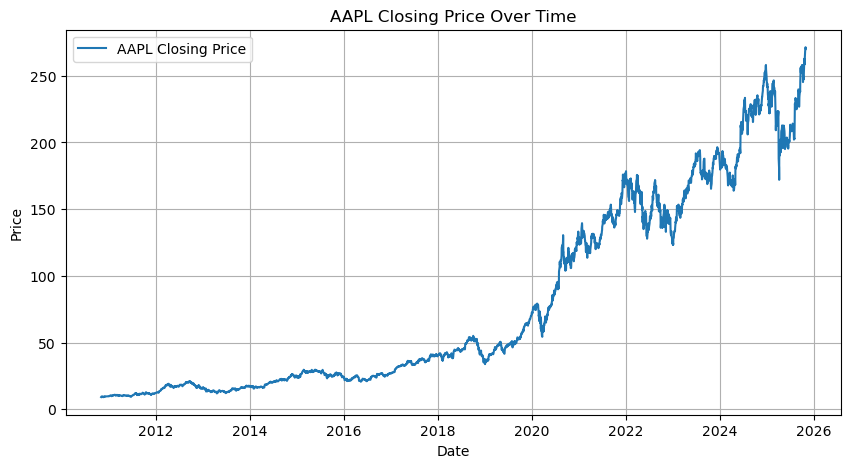

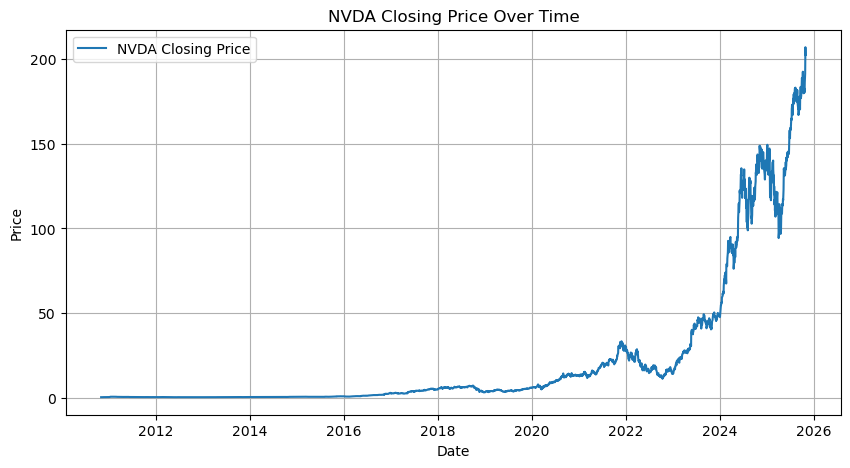

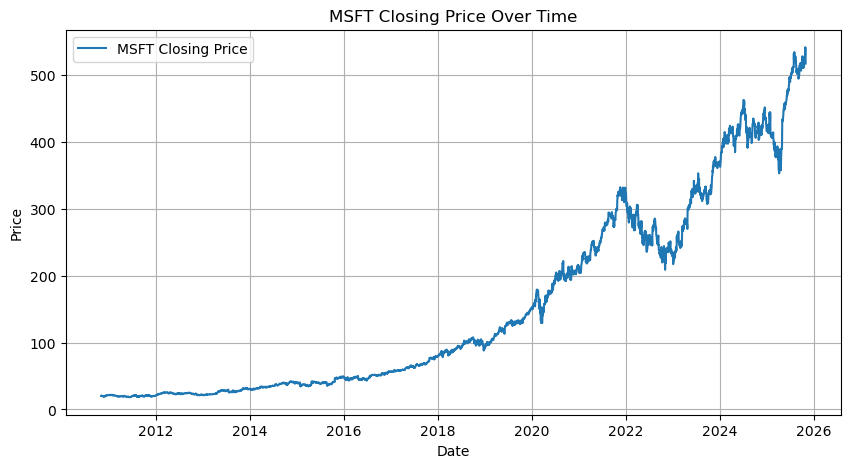

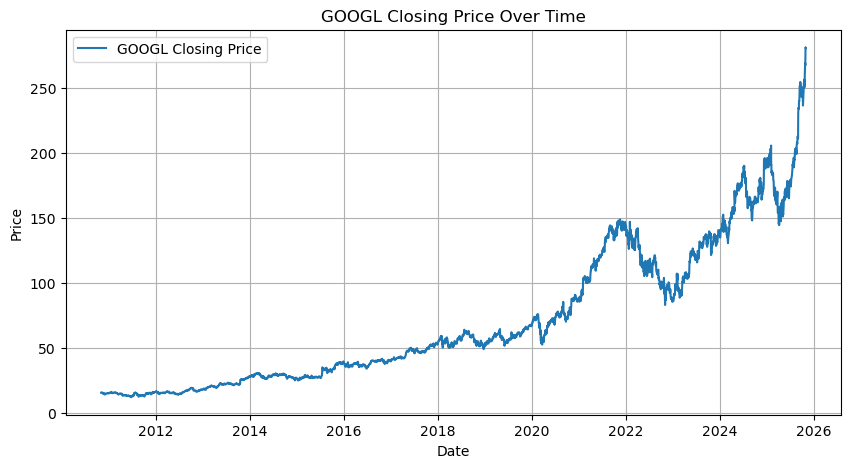

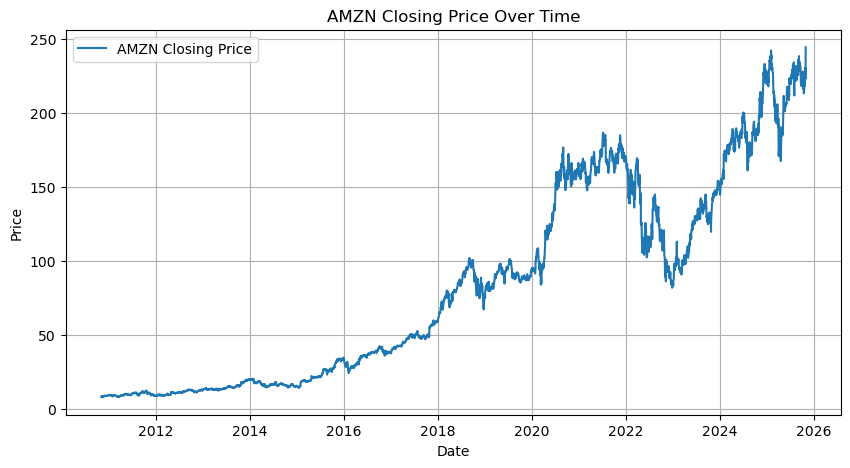

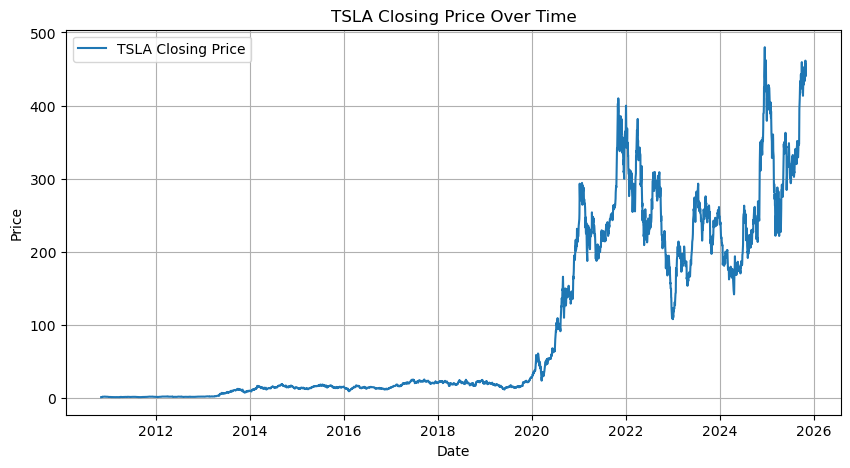

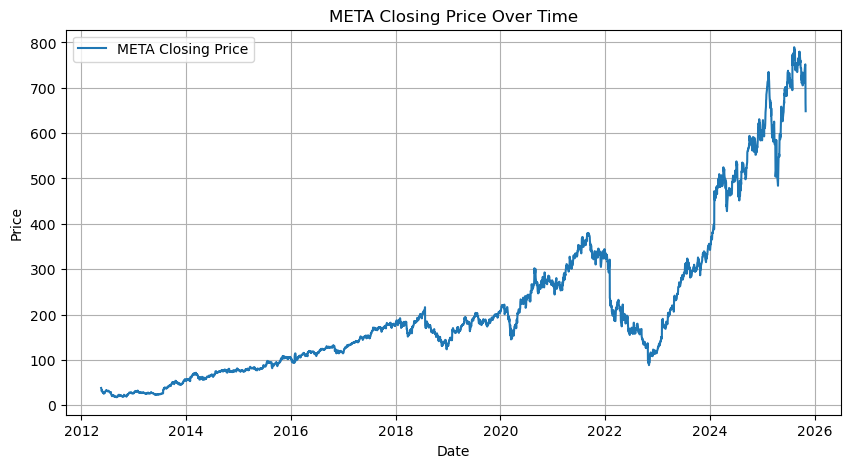

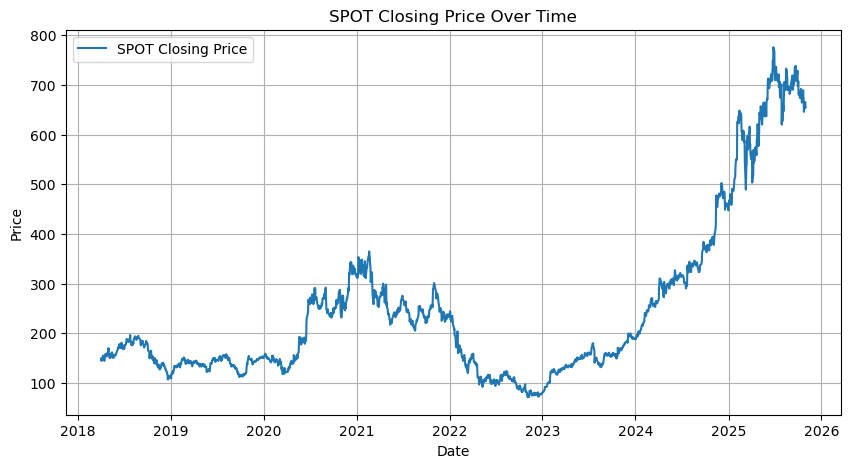

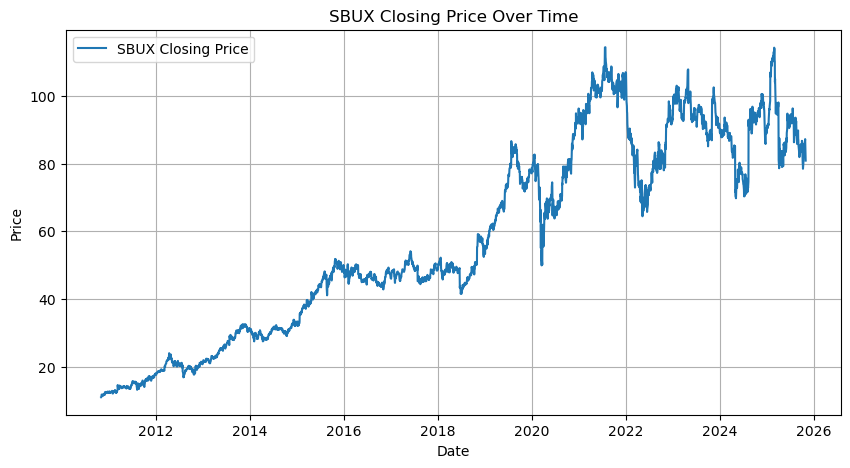

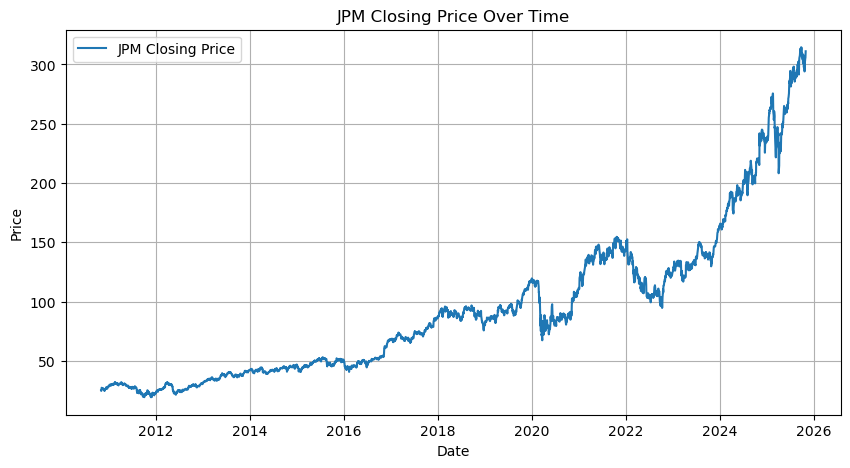

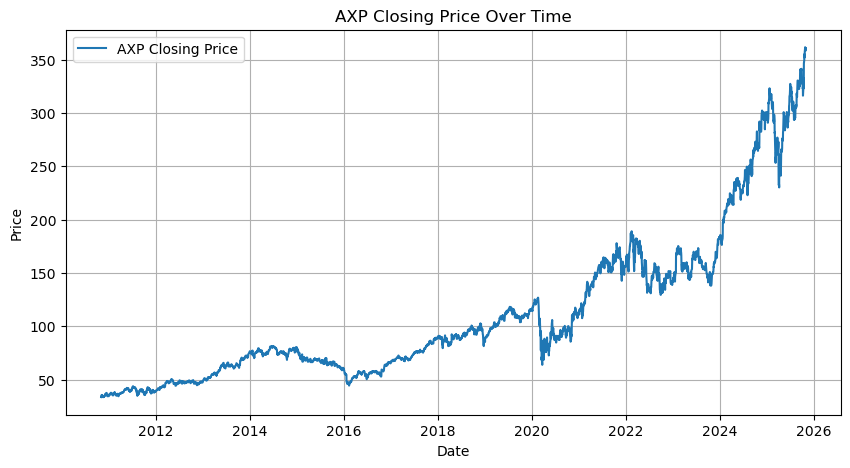

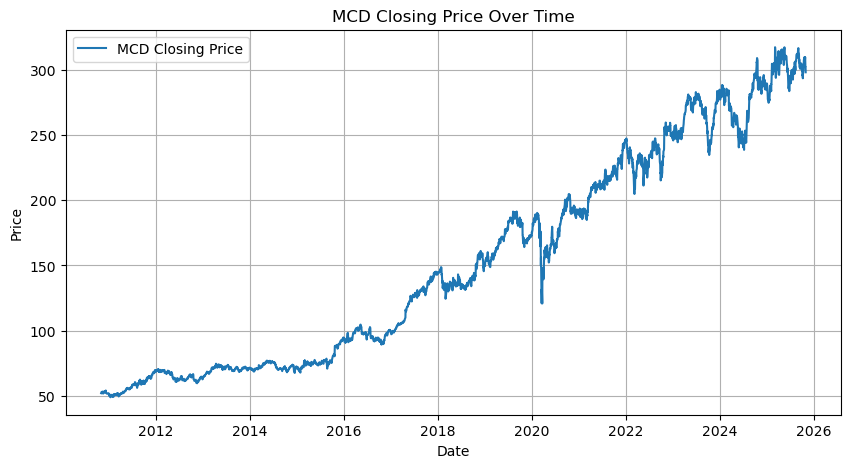

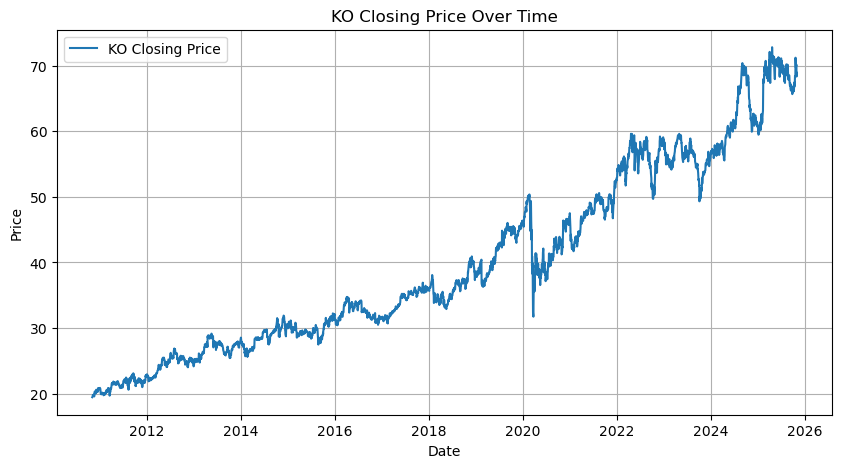

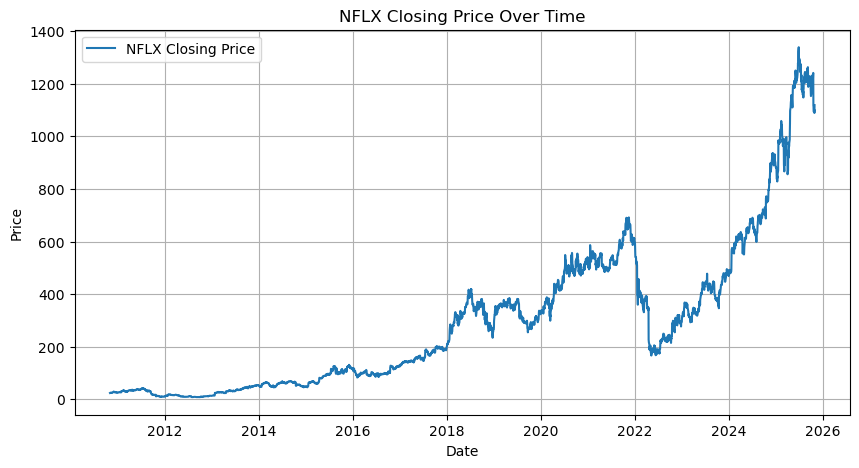

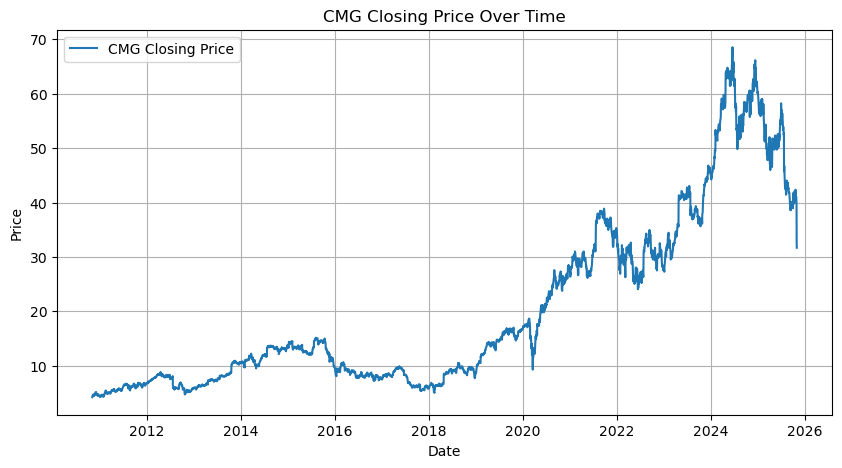

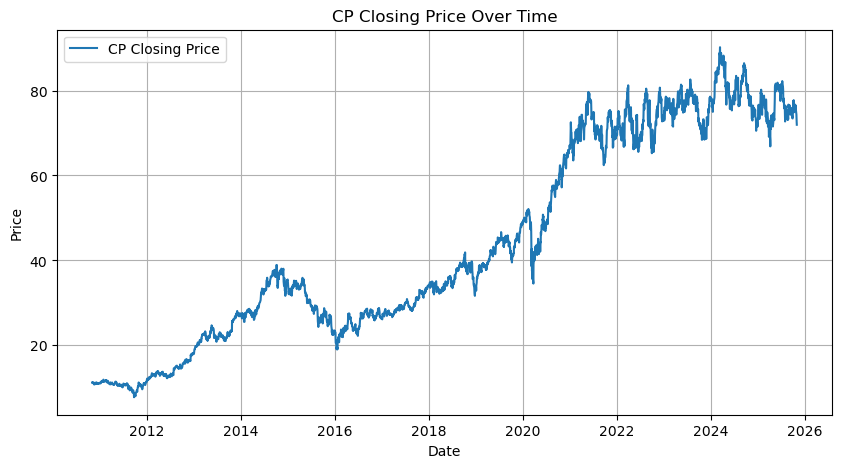

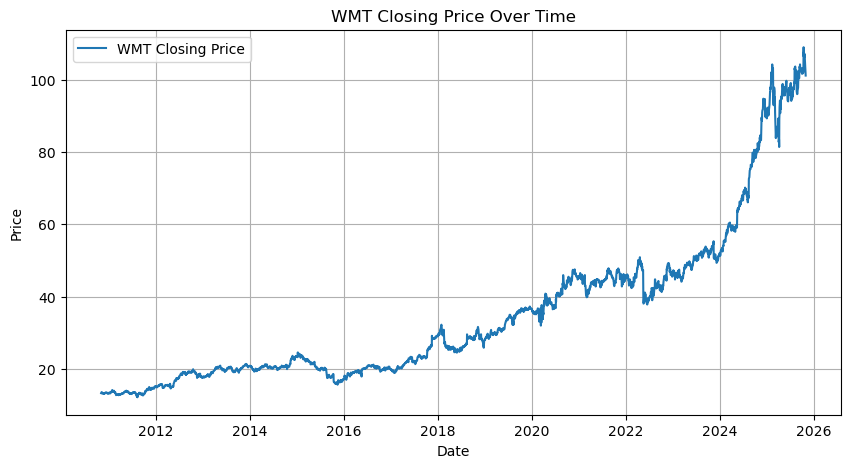

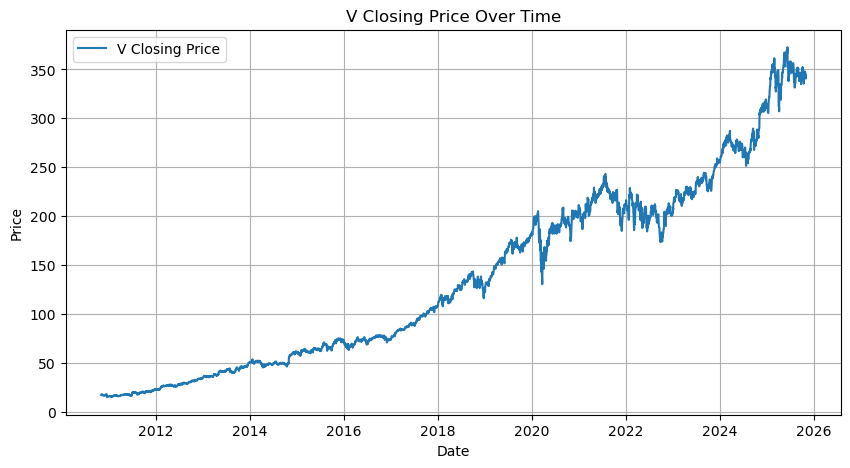

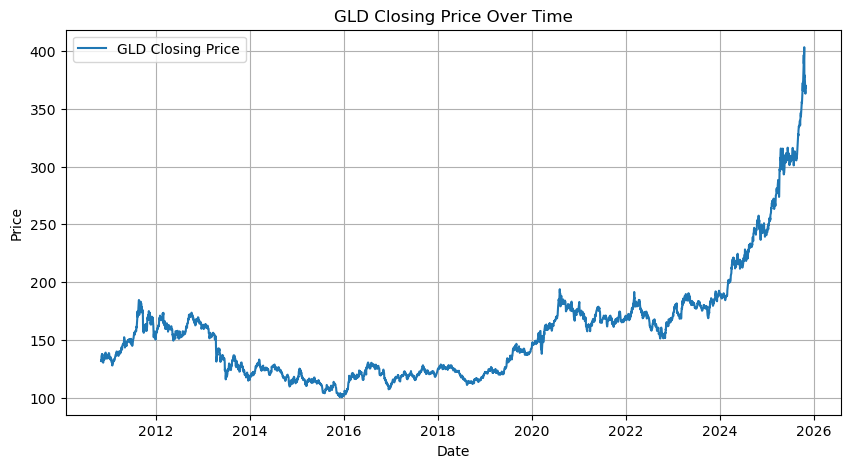

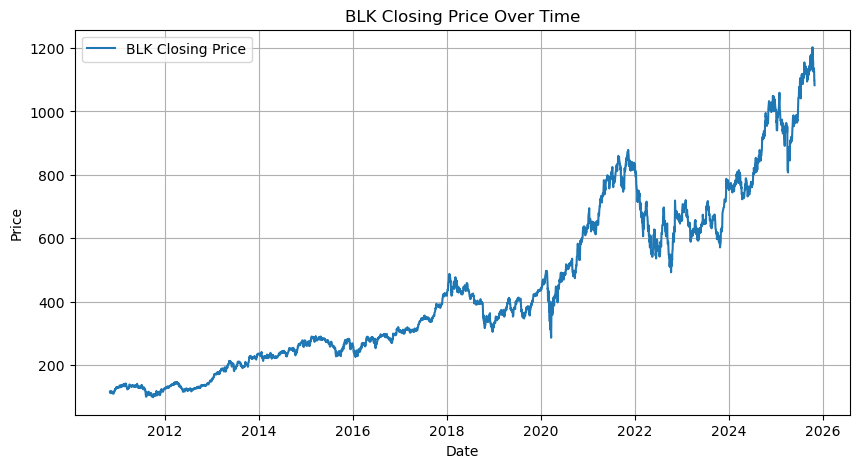

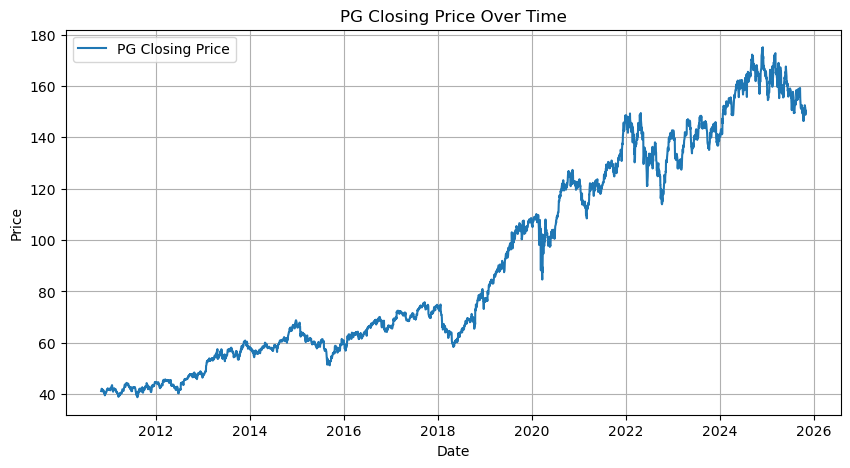

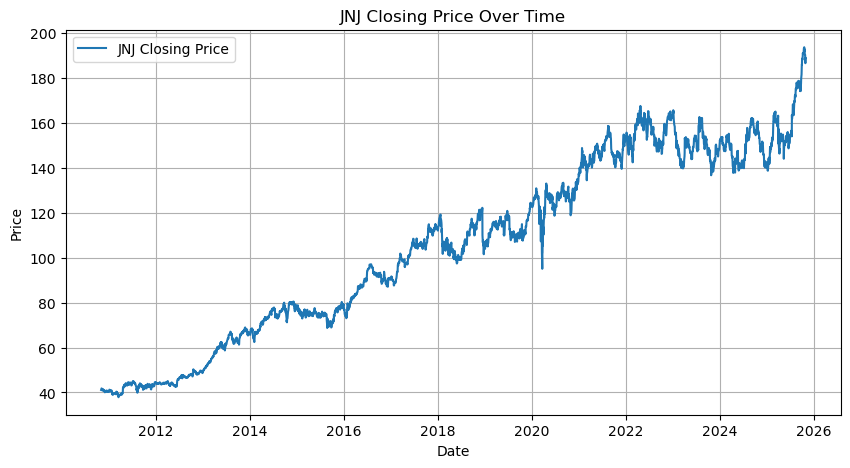

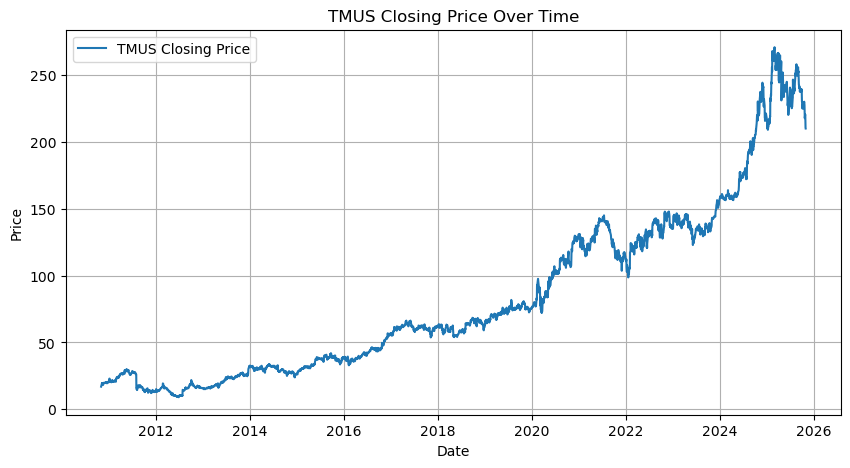

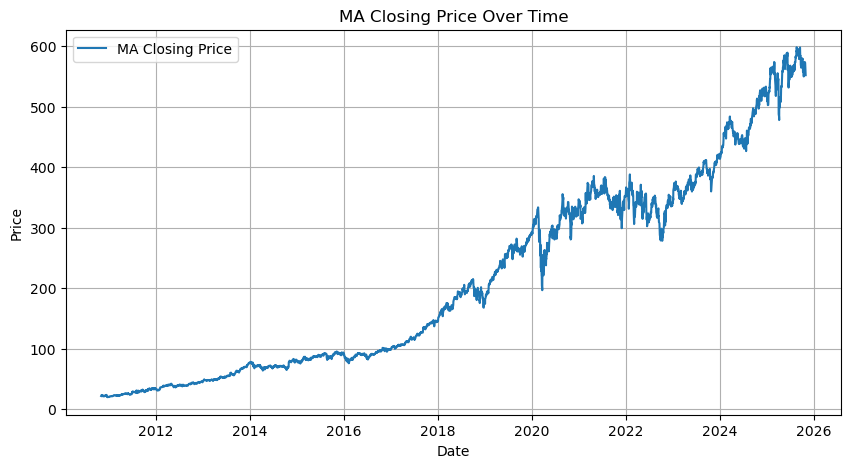

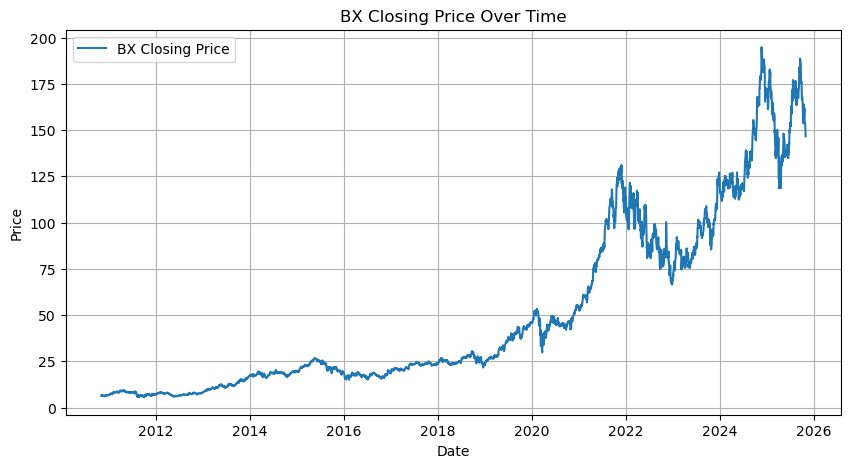

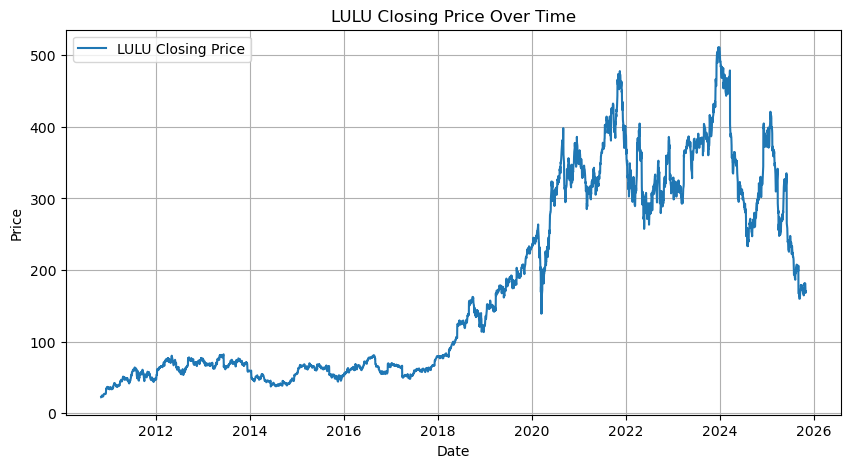

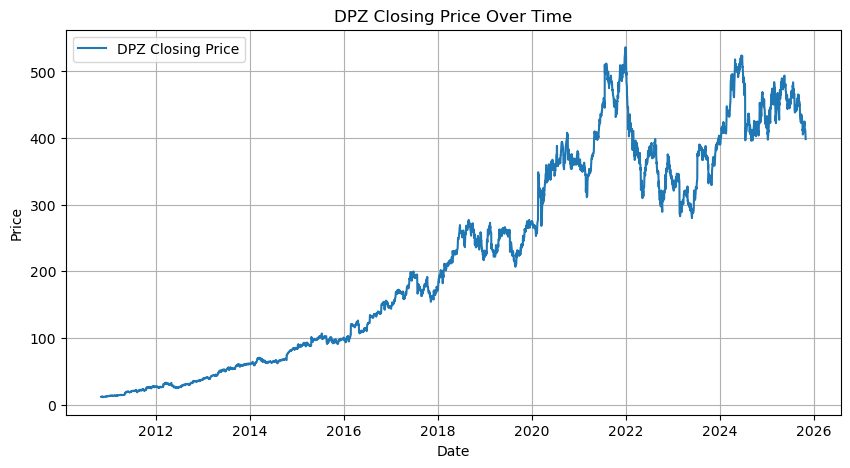

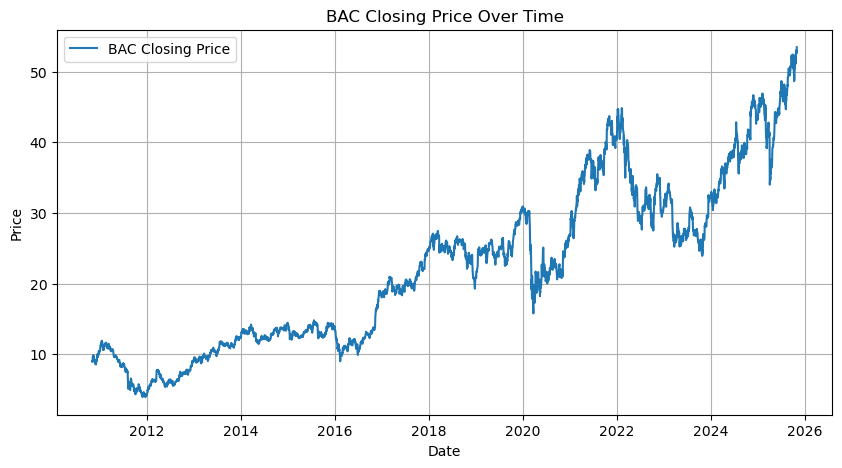

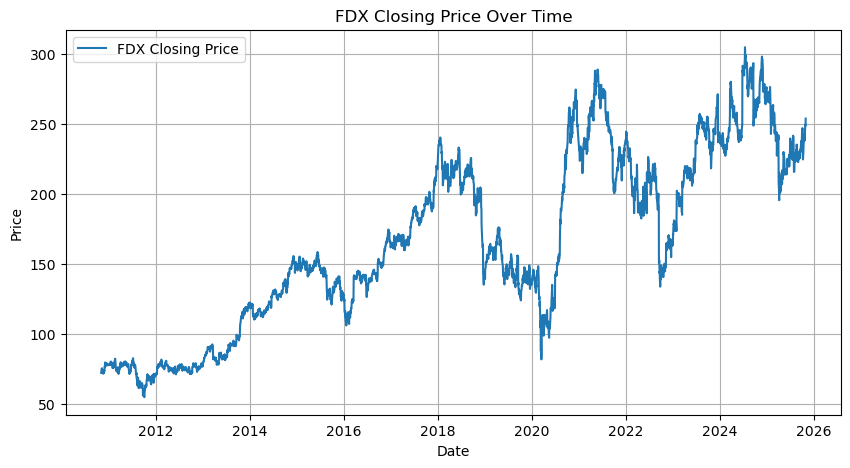

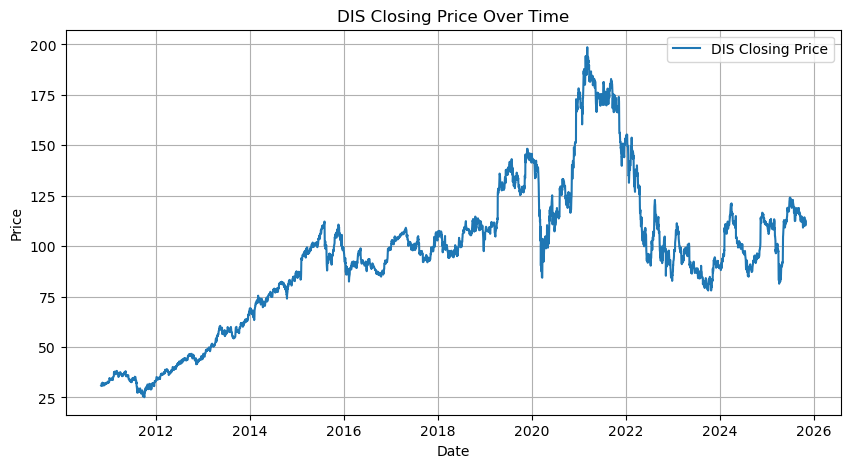

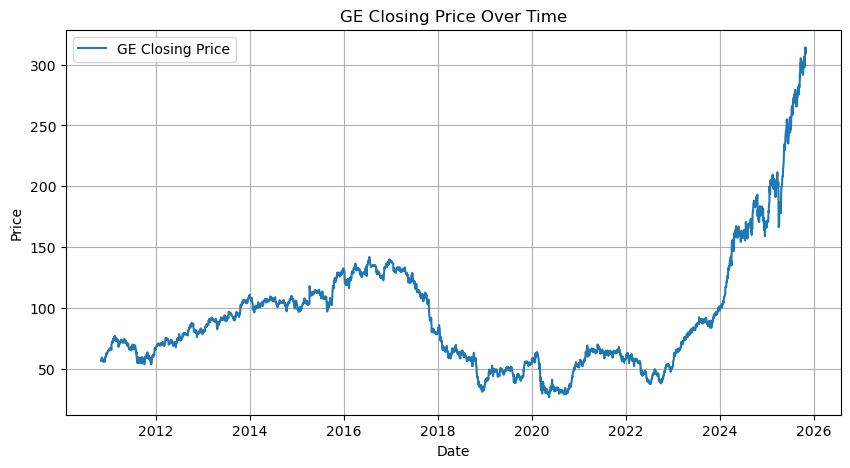

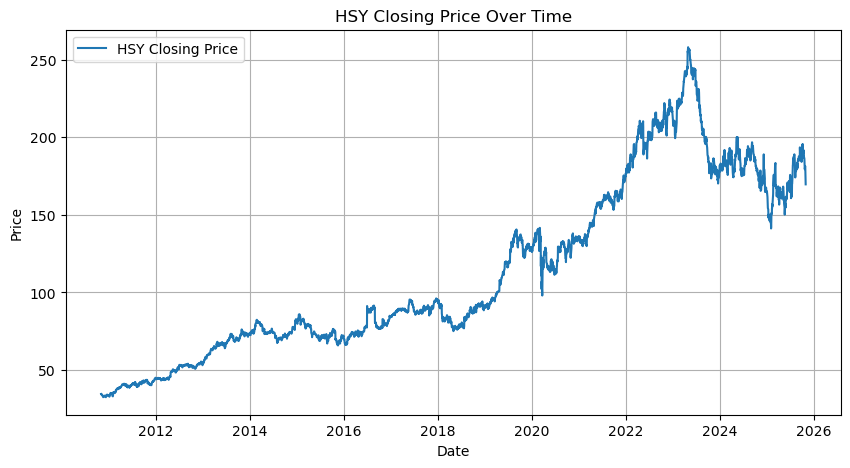

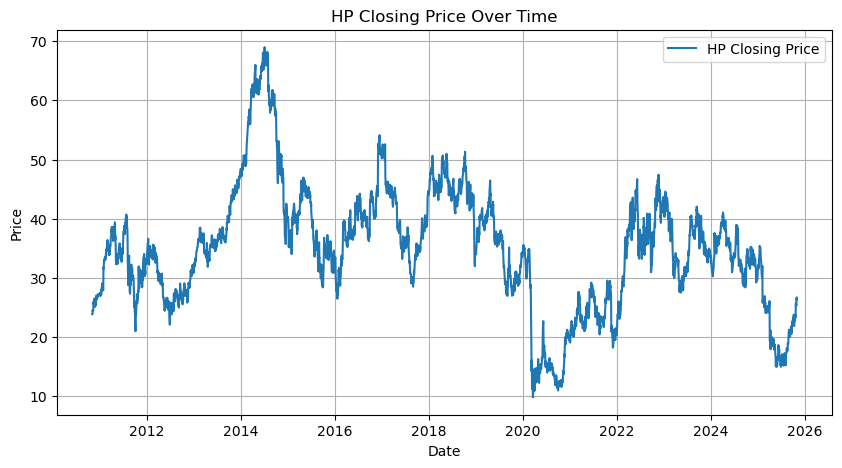

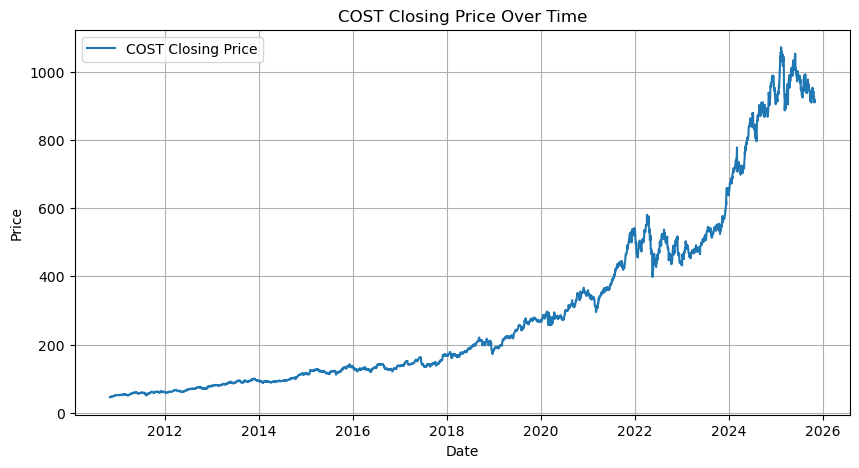

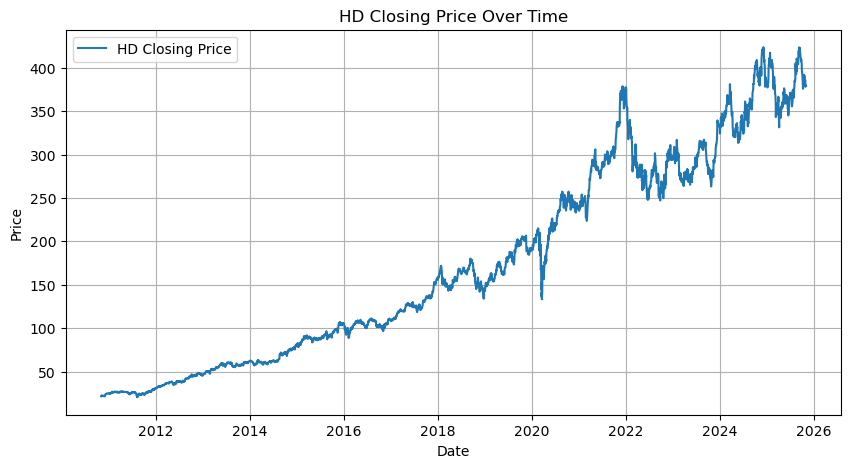

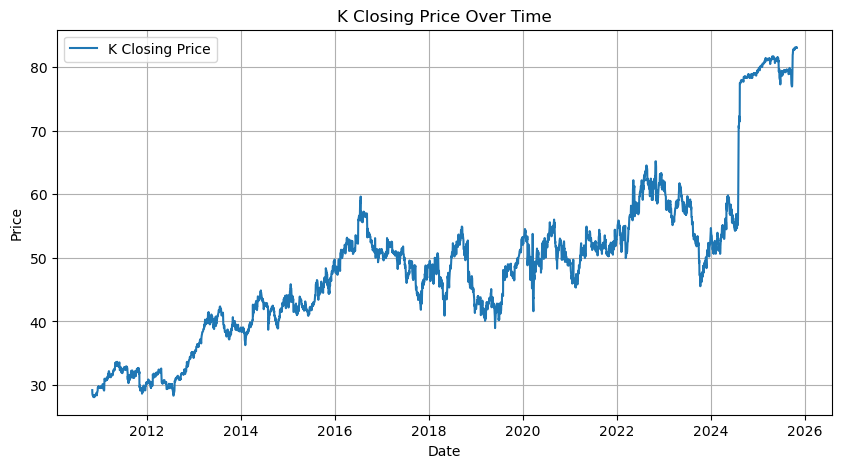

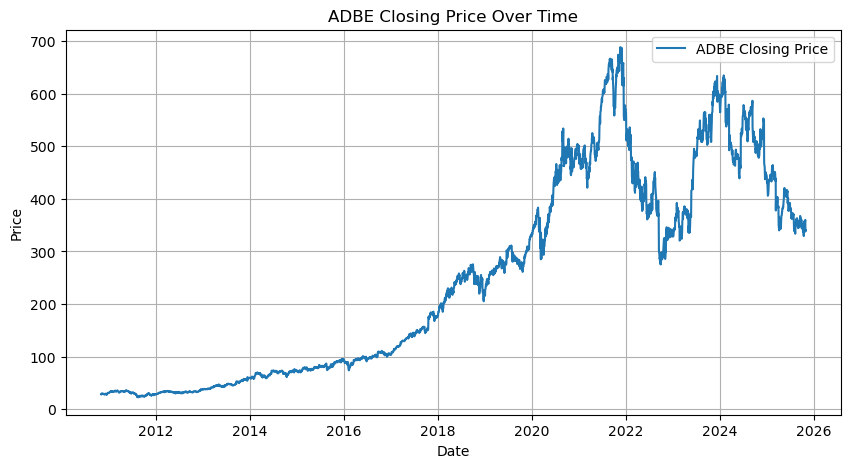

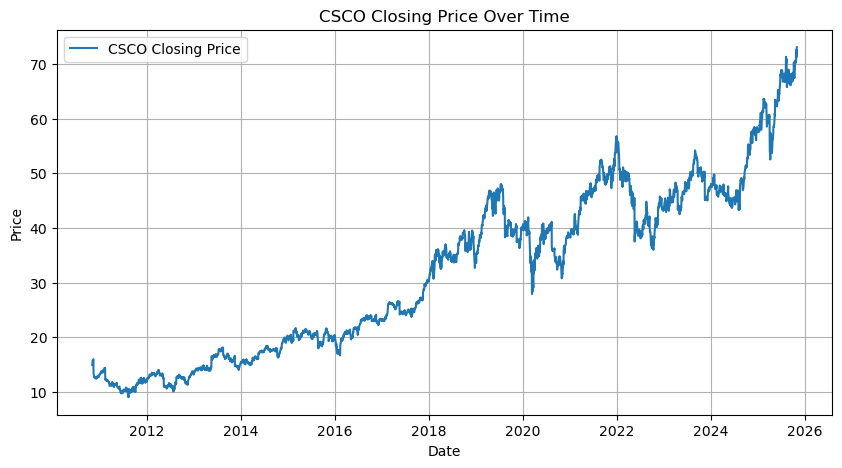

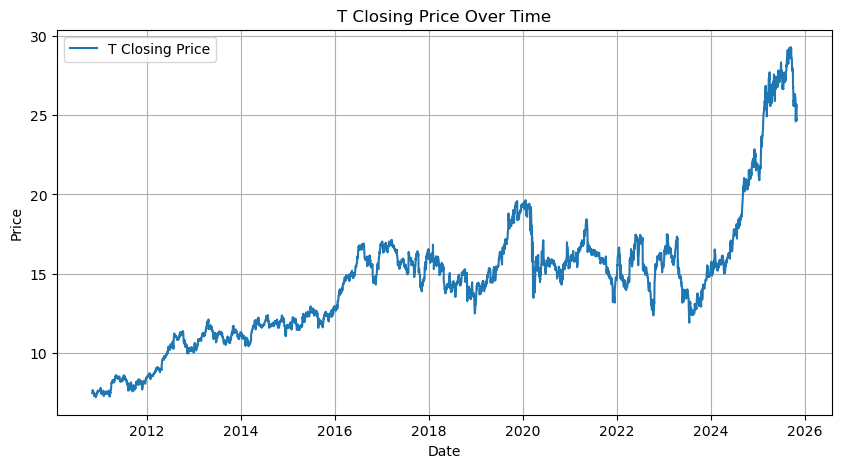

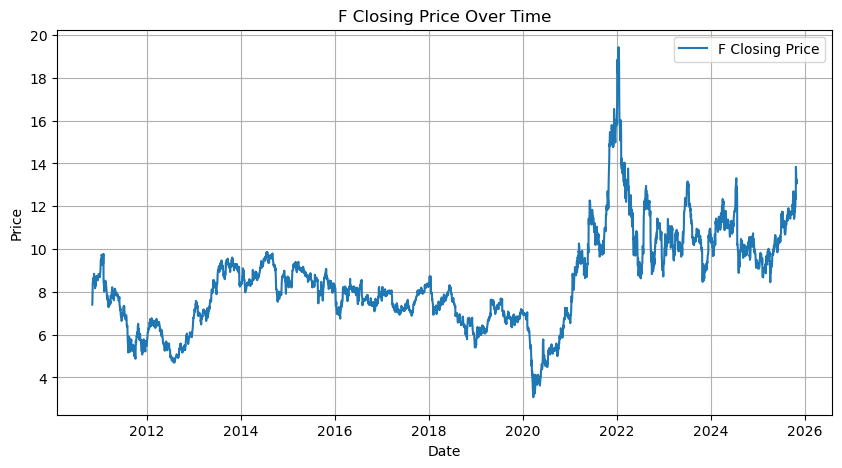

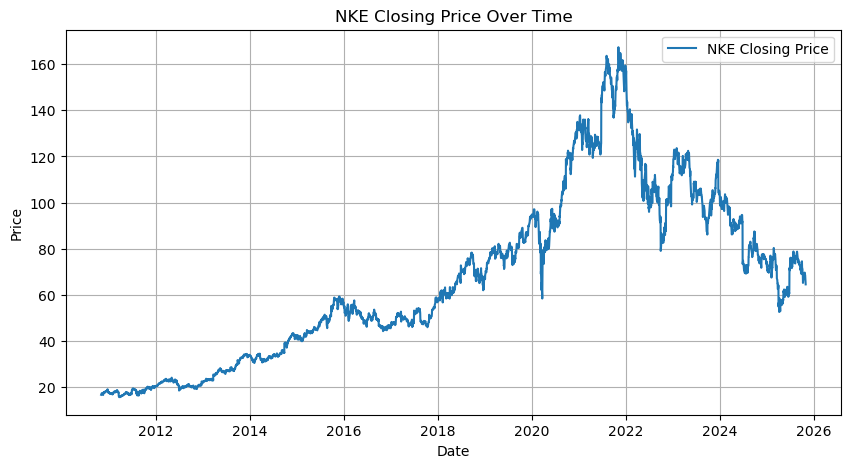

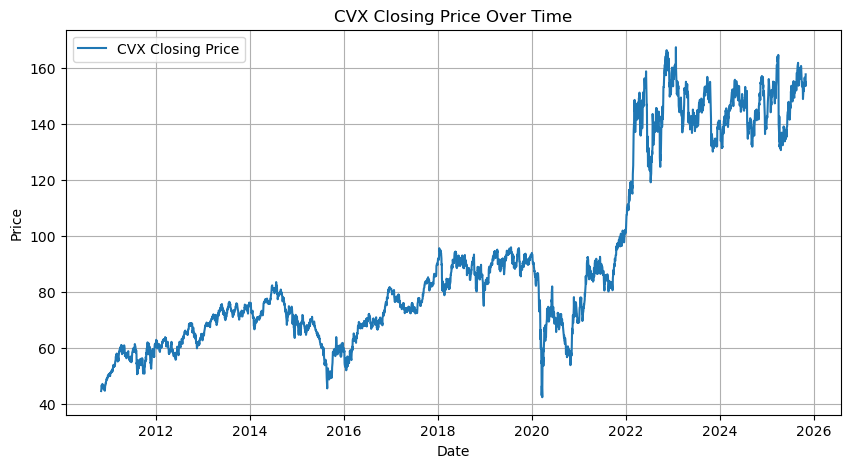

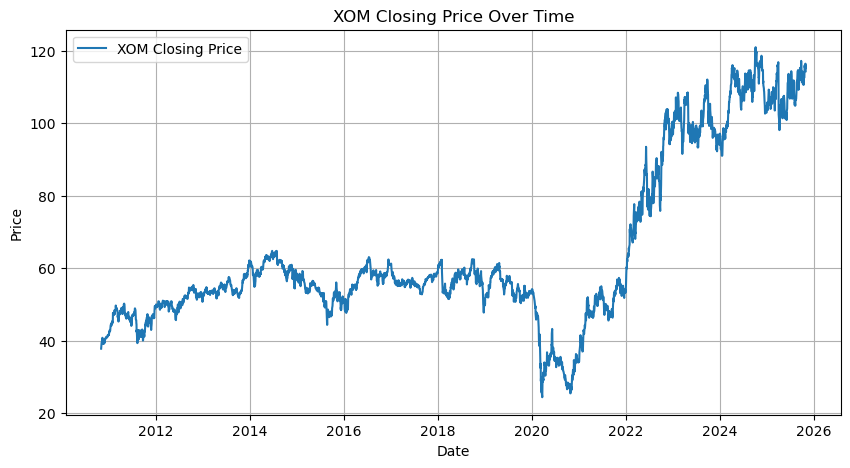

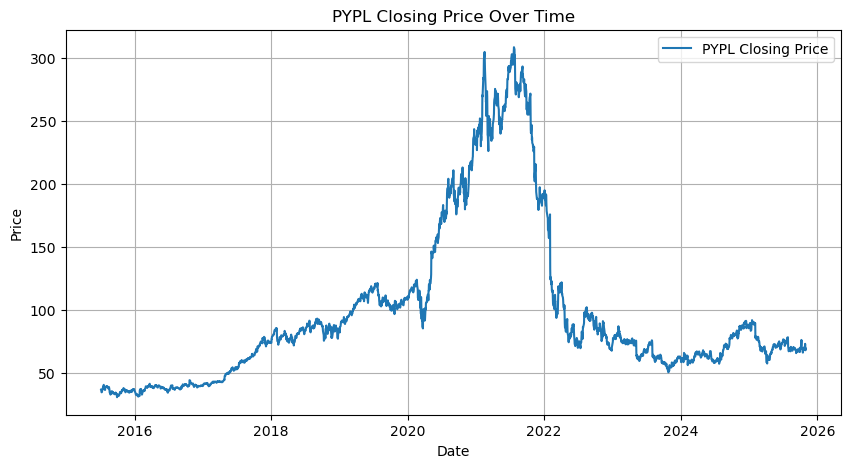

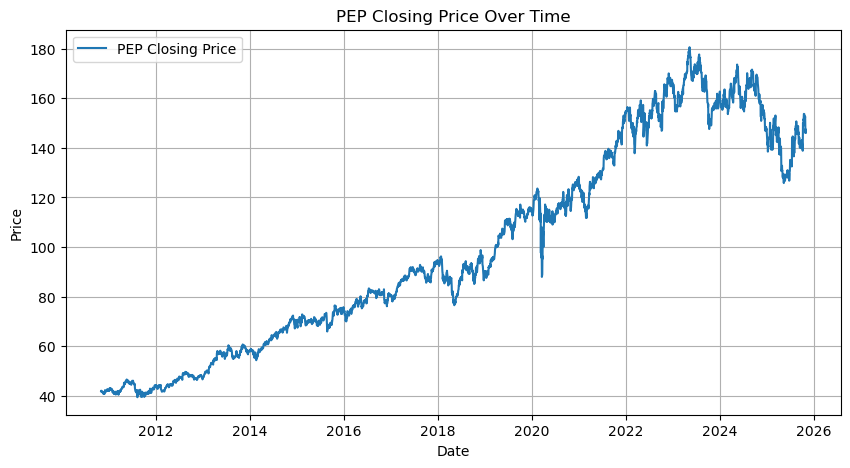

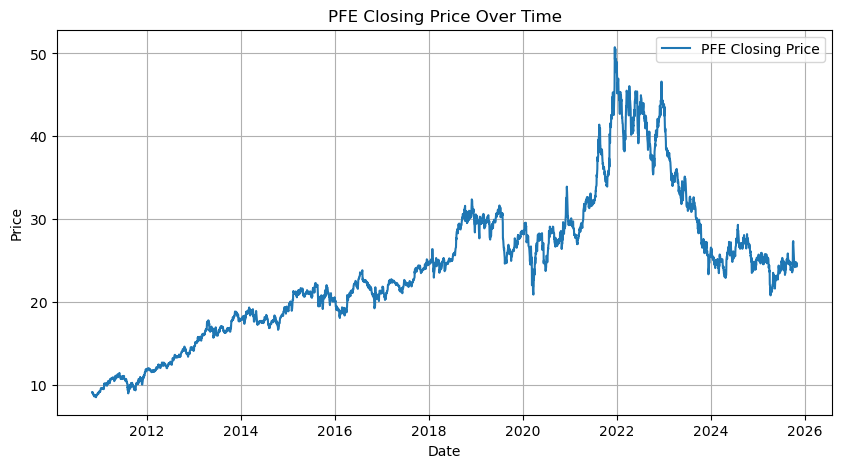

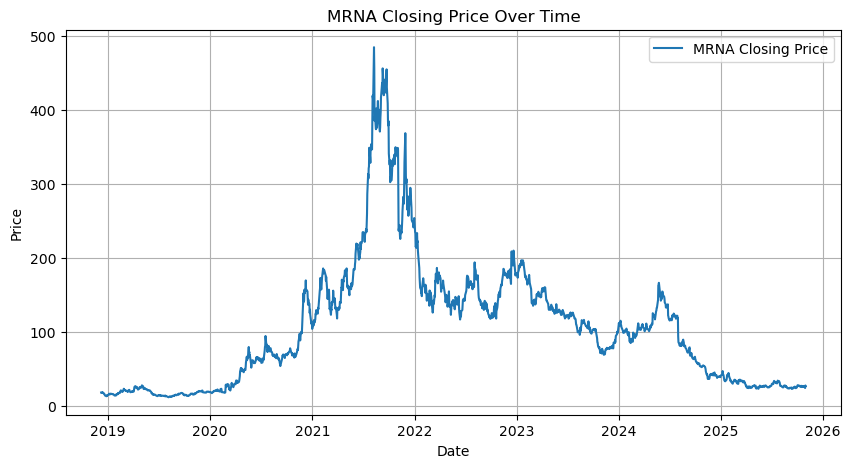

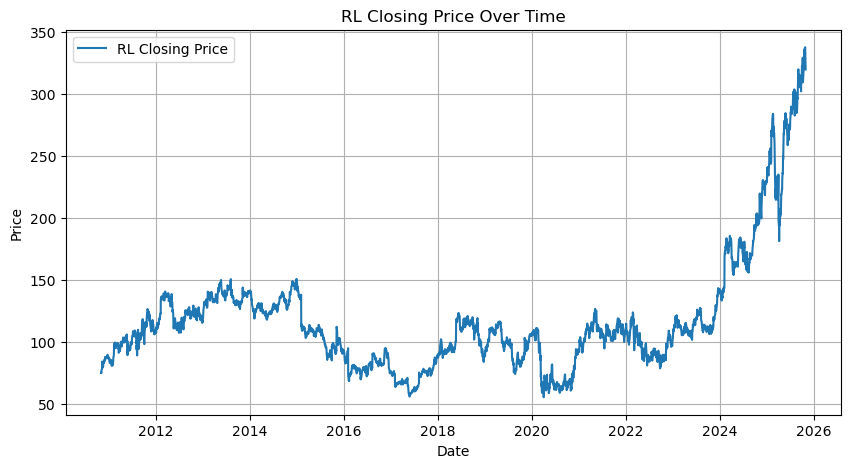

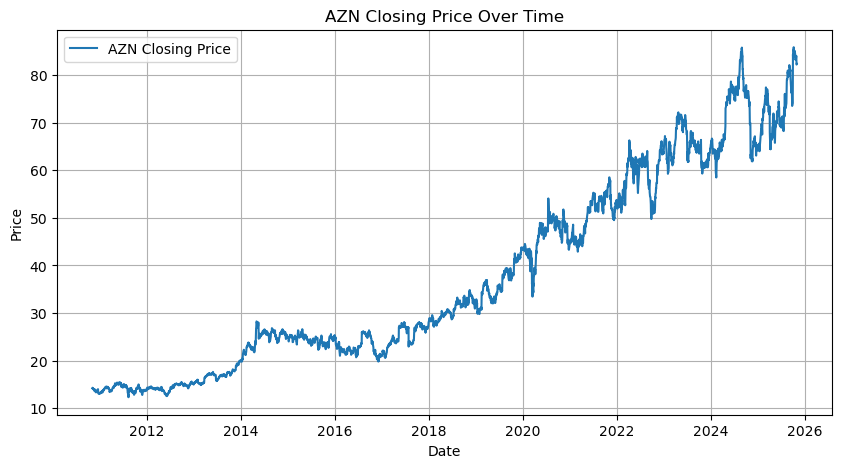

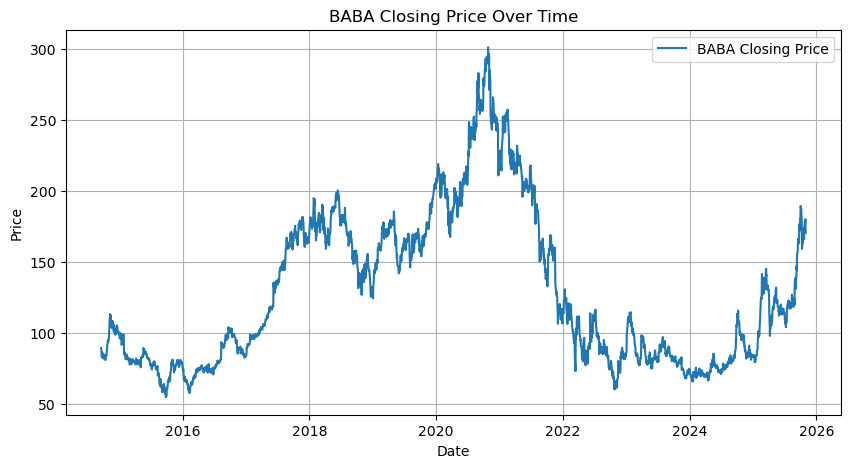

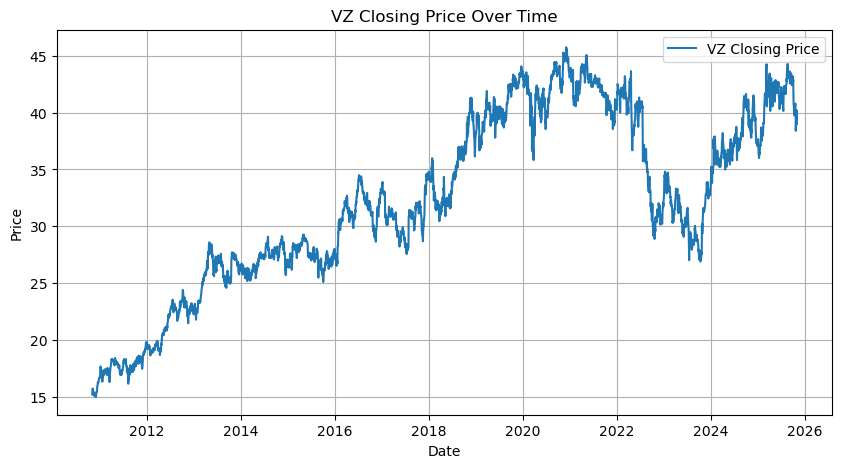

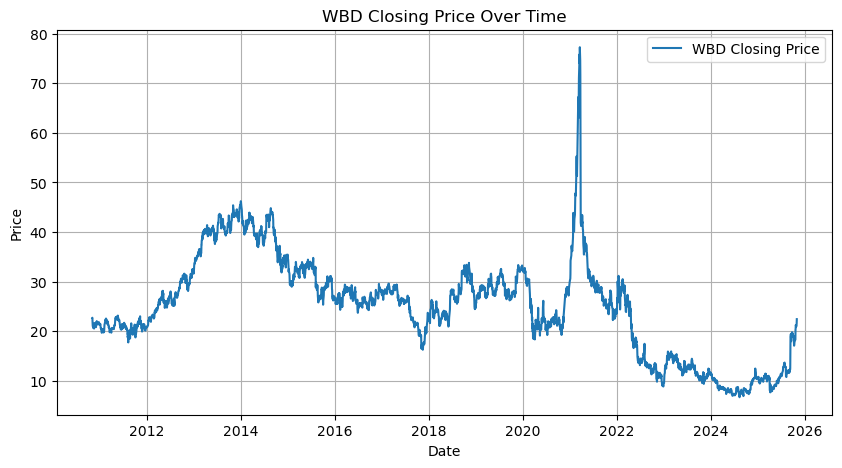

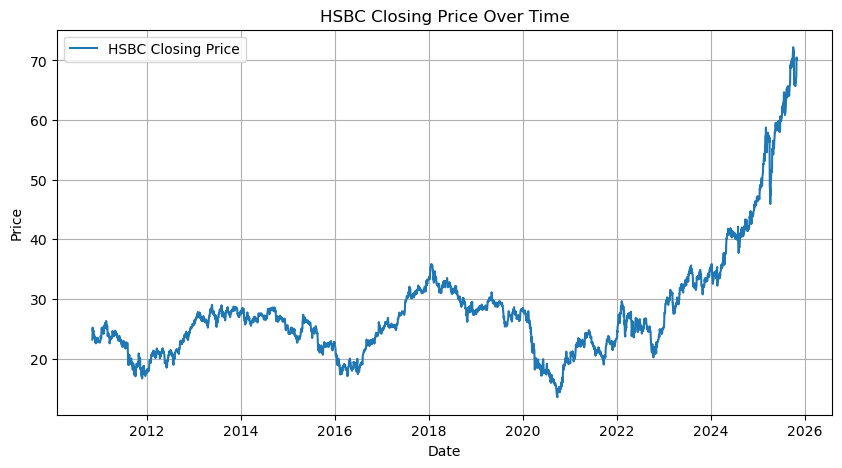

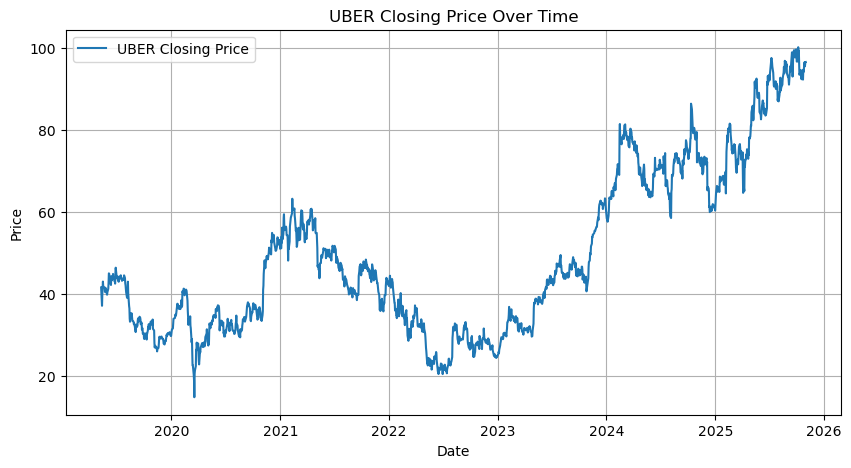

In [4]:
for ticker in tickers:
    plot_price(df, ticker)

In [ ]:
horizon = 5
alpha = 0.01
# Base alpha 0.02
# HP, LULU, RL, VZ (0.01), XOM, KO, PFE
ticker = 'PFE'
df = get_signals(df, horizon, alpha, ticker)
signal_distribution(df)

Signal Distribution:
Signal 1: Count = 1375, Percentage = 36.43%
Signal 0: Count = 1241, Percentage = 32.88%
Signal -1: Count = 1158, Percentage = 30.68%
